
**Description:**
This notebook shows how to download Argo data in a few lines.

This is a brief overview of the [Session 2 notebooks on data fetching (↗)](https://github.com/euroargodev/argopy-training/blob/main/notebooks/argo-data-fetching).


**Table of Contents**
- [Load Argo regional data](#load-argo-regional-data)
- [Load Argo float data](#load-argo-float-data)
  - [For scientists](#for-scientists)
  - [For experts/operators](#for-experts/operators)
- [Search index of Argo files](#search-index-of-argo-files)
***

In [ ]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

import xarray as xr

from argopy import DataFetcher
from argopy.plot import scatter_map, scatter_plot

## Load Argo regional data

To that end, we'll use the argopy [DataFetcher (↗)](https://argopy.readthedocs.io/en/v1.3.1/generated/argopy.fetchers.ArgoDataFetcher.html#argopy.fetchers.ArgoDataFetcher):

From this *default* [DataFetcher (↗)](https://argopy.readthedocs.io/en/v1.3.1/generated/argopy.fetchers.ArgoDataFetcher.html#argopy.fetchers.ArgoDataFetcher), you can load data from a specific domain as simply as:

**TODO:** Add `cache` argument to `DataFetcher` call: `DataFetcher(cache=True, parallel=True)`

In [2]:
%%time

# Papagayo upwelling region
# -90.7, -85.5, 10.0, 11.9
# http://bboxfinder.com/#9.979671,-90.681152,11.845847,-85.528564

    # [-91, -86, 10, 12, 
    #  0, 300, 
f = DataFetcher(cache=True, parallel=True).region(
    [-91, -86, 8, 12, 
     0, 700, 
     '2005-01', '2025-12']
)

ds = f.data
ds.argo

CPU times: user 12.9 s, sys: 1.84 s, total: 14.7 s
Wall time: 1min 17s


<xarray.Dataset.argo>
This is a collection of Argo points
N_POINTS(241455) ~ N_PROF(812) x N_LEVELS(551)

In [3]:
ds

<xarray.Dataset> Size: 29MB
Dimensions:          (N_POINTS: 241455)
Coordinates:
  * N_POINTS         (N_POINTS) int64 2MB 0 1 2 3 ... 241452 241453 241454
    LATITUDE         (N_POINTS) float64 2MB 10.0 10.0 10.0 ... 9.447 9.447 9.447
    LONGITUDE        (N_POINTS) float64 2MB -87.0 -87.0 -87.0 ... -90.97 -90.97
    TIME             (N_POINTS) datetime64[ns] 2MB 2005-12-07T10:36:00 ... 20...
Data variables: (12/15)
    CYCLE_NUMBER     (N_POINTS) int64 2MB 0 0 0 0 0 0 0 ... 26 26 26 26 26 26 26
    DATA_MODE        (N_POINTS) <U1 966kB 'R' 'R' 'R' 'R' ... 'R' 'R' 'R' 'R'
    DIRECTION        (N_POINTS) <U1 966kB 'D' 'D' 'D' 'D' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_POINTS) int64 2MB 1900379 1900379 ... 2903904 2903904
    POSITION_QC      (N_POINTS) int64 2MB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PRES             (N_POINTS) float32 966kB 45.0 55.0 65.0 ... 685.1 695.0
    ...               ...
    PSAL_ERROR       (N_POINTS) float32 966kB nan nan nan nan ... nan nan nan
    PSAL_QC          (N_POINTS) int64 2MB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TEMP             (N_POINTS) float32 966kB 15.76 14.86 14.59 ... 6.369 6.301
    TEMP_ERROR       (N_POINTS) float32 966kB nan nan nan nan ... nan nan nan
    TEMP_QC          (N_POINTS) int64 2MB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TIME_QC          (N_POINTS) int64 2MB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         erddap.ifremer.fr
    Fetched_by:           mayorga
    Fetched_date:         2025/11/25
    Fetched_constraints:  [x=-91.00/-86.00; y=8.00/12.00; z=0.0/350.0; t=2005...
    Fetched_uri:          https://erddap.ifremer.fr/erddap/tabledap/ArgoFloat...
    Processing_history:   [PRES,TEMP,PSAL] real-time and adjusted/delayed var...

<br>

In this example, we used a [DataFetcher (↗)](https://argopy.readthedocs.io/en/v1.3.1/generated/argopy.fetchers.ArgoDataFetcher.html#argopy.fetchers.ArgoDataFetcher) to get data for a given space/time region.

We retrieved all Argo data measurements from 75W to 45W, 20N to 30N, 0db to 100db and from January to May 2011 (the max date is exclusive).

Data are returned as a collection of measurements in a [xarray.Dataset (↗)](https://docs.xarray.dev/en/stable/user-guide/data-structures.html#dataset).

Note also, that from this dataset output, you will get information about where data were downloaded, and in the processing history, how raw data were transformed.

Many features come with a [DataFetcher (↗)](https://argopy.readthedocs.io/en/v1.3.1/generated/argopy.fetchers.ArgoDataFetcher.html#argopy.fetchers.ArgoDataFetcher), plotting is one of them:

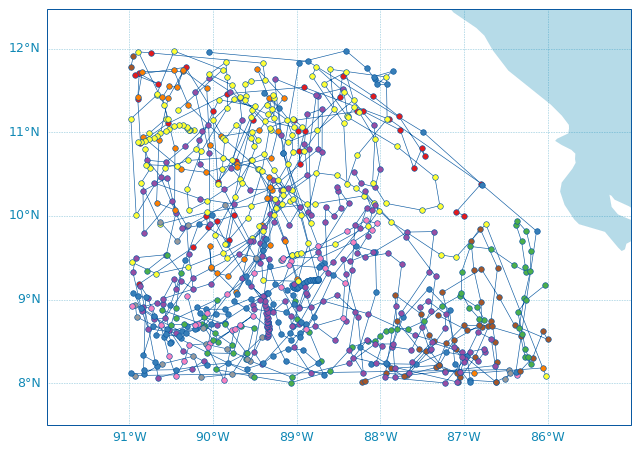

In [4]:
f.plot('trajectory', markersize=20, legend=False, padding=[1.0, 0.5]);

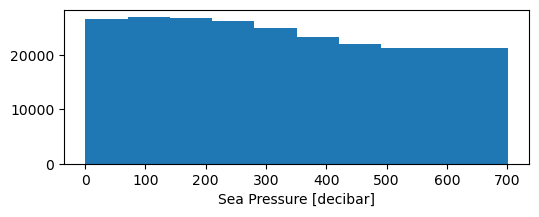

In [31]:
ds['PRES'].plot.hist(figsize=(6,2));

In [6]:
f.domain

[np.float64(-90.985),
 np.float64(-86.00025177001953),
 np.float64(8.0036),
 np.float64(11.974305333333332),
 np.float32(0.1),
 np.float32(701.1),
 np.datetime64('2005-12-07T10:36:00.000000000'),
 np.datetime64('2025-11-25T02:40:26.000000000')]

TODO: Cambiar de colormap (`cmap` arg) a uno continuo; y ver porque no muestra valores de presion hasta ~ 0

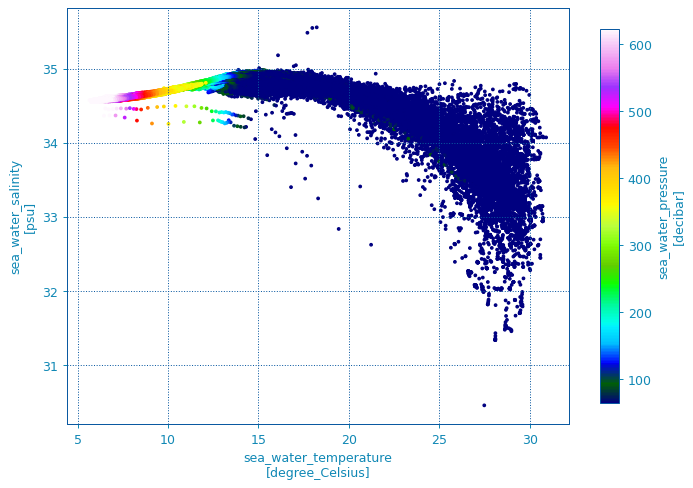

In [7]:
f.plot('PRES', this_x='TEMP', this_y='PSAL', cbar=True, figsize=(9,6));

## Calculate profile MLD

The most simple example is when the diagnostic method does not need arguments.

To illustrate this, let's apply a diagnostic that computes the mixed layer depth for a profile.

🛟 It is important to note that the per-profile diagnostic will receive 1-dimensional arrays of one profile data, not xarray object. 

Such a diagnostic could be written as:

In [8]:
def diag_mld(pres, sig0, threshold_depth=10):
    """Return MLD with Boyer Montégut method with threshold of σ(10m) + 0.03 kg.m-3"""
    # Reference values
    threshold = 0.03
    # threshold_depth = 10
    
    # Filter out NaN values
    idx = ~np.logical_or(np.isnan(pres), np.isnan(sig0))
    sig0_depth, sig0 = pres[idx], sig0[idx]

    # Check if there are valid data points near the reference depth
    if not np.any((sig0_depth >= 0) & (sig0_depth <= threshold_depth)):
        return np.nan

    # Get the reference density at the threshold depth
    index_threshold = np.argmin(np.abs(sig0_depth - threshold_depth))
    sig0_at_threshold = sig0[index_threshold]

    # Find the first depth where density exceeds the threshold
    exceeds_threshold = sig0[index_threshold:] > sig0_at_threshold + threshold
    if not np.any(exceeds_threshold):
        return np.nan

    mld_index = np.where(exceeds_threshold)[0][0] + index_threshold
    
    return sig0_depth[mld_index]

convert this collection of points to a collection of profiles:

In [9]:
dsp = ds.argo.point2profile()
dsp.argo

<xarray.Dataset.argo>
This is a collection of Argo profiles
N_PROF(812) x N_LEVELS(551) ~ N_POINTS(447412)

In [10]:
dsp

<xarray.Dataset> Size: 11MB
Dimensions:          (N_PROF: 812, N_LEVELS: 551)
Coordinates:
  * N_PROF           (N_PROF) int64 6kB 25 26 294 295 27 ... 782 91 368 805 155
  * N_LEVELS         (N_LEVELS) int64 4kB 0 1 2 3 4 5 ... 546 547 548 549 550
    LATITUDE         (N_PROF) float64 6kB 10.0 10.05 8.145 ... 8.652 9.048 9.447
    LONGITUDE        (N_PROF) float64 6kB -87.0 -87.09 -87.23 ... -90.31 -90.97
    TIME             (N_PROF) datetime64[ns] 6kB 2005-12-07T10:36:00 ... 2025...
Data variables: (12/15)
    CYCLE_NUMBER     (N_PROF) int64 6kB 0 0 82 83 36 37 ... 25 155 27 27 21 26
    DATA_MODE        (N_PROF) <U1 3kB 'R' 'R' 'D' 'D' 'D' ... 'R' 'R' 'A' 'R'
    DIRECTION        (N_PROF) <U1 3kB 'D' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_PROF) int64 6kB 1900379 1900379 ... 7901042 2903904
    POSITION_QC      (N_PROF) int64 6kB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PRES             (N_PROF, N_LEVELS) float32 2MB 45.0 55.0 65.0 ... nan nan
    ...               ...
    PSAL_ERROR       (N_PROF, N_LEVELS) float32 2MB nan nan nan ... nan nan nan
    PSAL_QC          (N_PROF) int64 6kB 1 1 2 2 1 1 2 1 1 ... 1 1 1 1 1 1 1 1 1
    TEMP             (N_PROF, N_LEVELS) float32 2MB 15.76 14.86 ... nan nan
    TEMP_ERROR       (N_PROF, N_LEVELS) float32 2MB nan nan nan ... nan nan nan
    TEMP_QC          (N_PROF) int64 6kB 1 1 2 2 1 1 2 1 1 ... 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_PROF) int64 6kB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         erddap.ifremer.fr
    Fetched_by:           mayorga
    Fetched_date:         2025/11/25
    Fetched_constraints:  [x=-91.00/-86.00; y=8.00/12.00; z=0.0/350.0; t=2005...
    Fetched_uri:          https://erddap.ifremer.fr/erddap/tabledap/ArgoFloat...
    Processing_history:   [PRES,TEMP,PSAL] real-time and adjusted/delayed var...

We note that the `diag_mld` method above, takes pressure and potential density as arguments, in this order.

Argopy and xarray will handle all the axis and dimensions manipulation, so that you can focus on writing a reducer function dealing with 1D arrays for each requested parameters.

So, to apply this diagnostic to the xarray Argo dataset, we first need to compute SIG0 and then we can call the reducer:

In [11]:
dsp.argo.teos10(['SIG0']);

Plot depth profiles for an individual profile

**TODO:** Plot two sets of profiles: mean for january vs for july (but it won't convey variability around the mean). Will need to use `.set_coords('TIME')`. Then using something like `.sel(TIME.month=1).mean('TIME')`

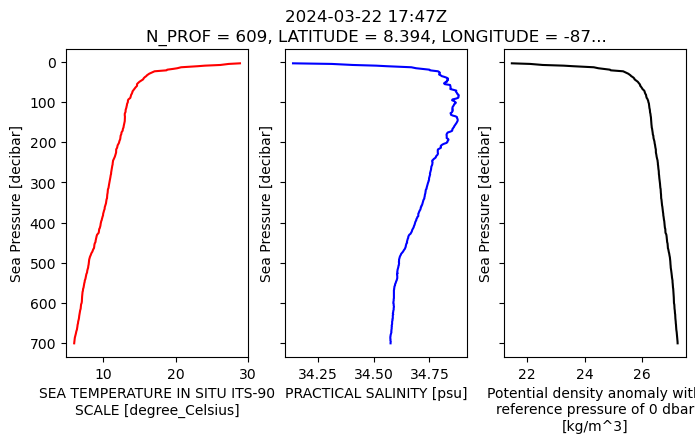

In [12]:
_, ax = plt.subplots(ncols=3, figsize=(8, 4), sharey=True)

dsp_perf = dsp.set_coords("PRES").isel(N_PROF=500)

dsp_perf['TEMP'].plot(ax=ax[0], y='PRES', yincrease=False, color='red')
ax[0].set_title(None)
dsp_perf['PSAL'].plot(ax=ax[1], y='PRES', yincrease=False, color='blue')
dsp_perf['SIG0'].plot(ax=ax[2], y='PRES', yincrease=False, color='black')
ax[2].set_title(None);

plt.suptitle(f"{dsp_perf.TIME.data.astype('datetime64[s]').item():%Y-%m-%d %H:%M}Z");

# dsp.set_coords("PRES")['TEMP'].isel(N_PROF=500).plot(y='PRES', yincrease=False, figsize=(3,5));

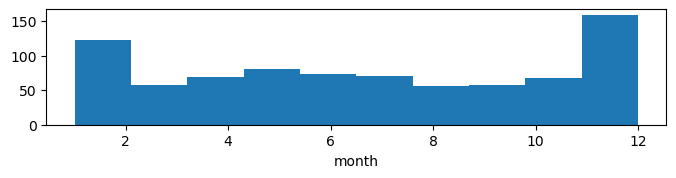

In [33]:
dsp['TIME.month'].plot.hist(figsize=(8, 1.5));

In [14]:
dsp_mensual = dsp.groupby("TIME.month").mean()
dsp_mensual['month'].attrs = {'long_name': 'Mes'}

dsp_mensual

<xarray.Dataset> Size: 217kB
Dimensions:          (month: 12, N_LEVELS: 551)
Coordinates:
  * month            (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
  * N_LEVELS         (N_LEVELS) int64 4kB 0 1 2 3 4 5 ... 546 547 548 549 550
Data variables: (12/14)
    CYCLE_NUMBER     (month) float64 96B 57.09 88.9 69.67 ... 105.9 62.04 73.58
    PLATFORM_NUMBER  (month) float64 96B 5.201e+06 5.075e+06 ... 4.43e+06
    POSITION_QC      (month) float64 96B 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    PRES             (month, N_LEVELS) float32 26kB 5.179 7.506 ... nan nan
    PRES_ERROR       (month, N_LEVELS) float32 26kB 2.384 2.384 ... nan nan
    PRES_QC          (month) float64 96B 1.0 1.0 1.0 1.0 ... 1.0 1.02 1.053
    ...               ...
    PSAL_QC          (month) float64 96B 1.0 1.0 1.0 1.0 ... 1.0 1.02 1.053
    TEMP             (month, N_LEVELS) float32 26kB 25.83 25.52 ... nan nan
    TEMP_ERROR       (month, N_LEVELS) float32 26kB 0.3403 0.277 ... nan nan
    TEMP_QC          (month) float64 96B 1.0 1.0 1.0 1.0 ... 1.0 1.02 1.053
    TIME_QC          (month) float64 96B 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    SIG0             (month, N_LEVELS) float64 53kB 22.24 22.35 ... nan nan
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         erddap.ifremer.fr
    Fetched_by:           mayorga
    Fetched_date:         2025/11/25
    Fetched_constraints:  [x=-91.00/-86.00; y=8.00/12.00; z=0.0/350.0; t=2005...
    Fetched_uri:          https://erddap.ifremer.fr/erddap/tabledap/ArgoFloat...
    Processing_history:   [PRES,TEMP,PSAL] real-time and adjusted/delayed var...

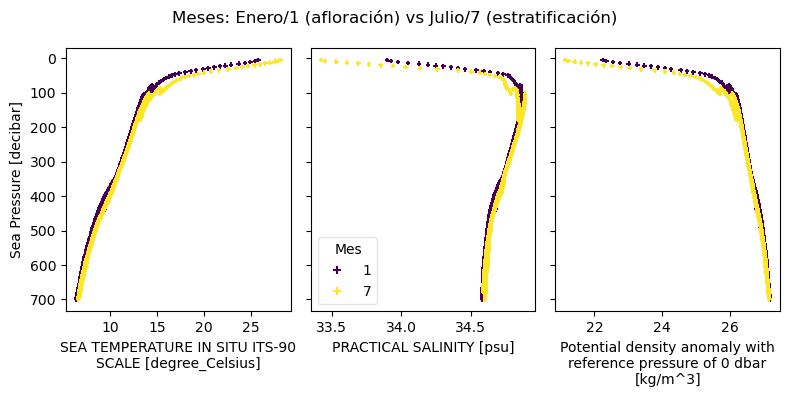

In [15]:
_, ax = plt.subplots(ncols=3, figsize=(8, 4), sharey=True)

dsp_perf_mensual = dsp_mensual.set_coords("PRES").sel(month=[1, 7])

kwargs = dict(
    y='PRES', yincrease=False, 
    hue='month', marker='+', levels=2, s=10, alpha=1, 
    add_colorbar=False
)
dsp_perf_mensual.plot.scatter(ax=ax[0], x='TEMP', **kwargs)
ax[0].set_title(None)
dsp_perf_mensual.plot.scatter(ax=ax[1], x='PSAL', add_legend=True, **kwargs)
ax[1].set_ylabel(None); ax[1].set_title(None)
dsp_perf_mensual.plot.scatter(ax=ax[2], x='SIG0', **kwargs)
ax[2].set_ylabel(None); ax[2].set_title(None)

plt.suptitle("Meses: Enero/1 (afloración) vs Julio/7 (estratificación)")
plt.tight_layout();

In [34]:
# dsp['MLD'] = dsp.argo.reduce_profile(diag_mld, params=['PRES', 'SIG0'])
dsp['MLD'] = dsp.argo.reduce_profile(
    diag_mld, params=['PRES', 'SIG0'], threshold_depth=80
)
dsp['MLD'].attrs = {
    'long_name': 'Profundidad de Capa de Mezcla (MLD)',
    'units': 'db',
    'method': 'Umbral de densidad'
}

dsp

<xarray.Dataset> Size: 14MB
Dimensions:          (N_PROF: 812, N_LEVELS: 551)
Coordinates:
  * N_PROF           (N_PROF) int64 6kB 25 26 294 295 27 ... 782 91 368 805 155
  * N_LEVELS         (N_LEVELS) int64 4kB 0 1 2 3 4 5 ... 546 547 548 549 550
    LATITUDE         (N_PROF) float64 6kB 10.0 10.05 8.145 ... 8.652 9.048 9.447
    LONGITUDE        (N_PROF) float64 6kB -87.0 -87.09 -87.23 ... -90.31 -90.97
    TIME             (N_PROF) datetime64[ns] 6kB 2005-12-07T10:36:00 ... 2025...
Data variables: (12/17)
    CYCLE_NUMBER     (N_PROF) int64 6kB 0 0 82 83 36 37 ... 25 155 27 27 21 26
    DATA_MODE        (N_PROF) <U1 3kB 'R' 'R' 'D' 'D' 'D' ... 'R' 'R' 'A' 'R'
    DIRECTION        (N_PROF) <U1 3kB 'D' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_PROF) int64 6kB 1900379 1900379 ... 7901042 2903904
    POSITION_QC      (N_PROF) int64 6kB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PRES             (N_PROF, N_LEVELS) float32 2MB 45.0 55.0 65.0 ... nan nan
    ...               ...
    TEMP             (N_PROF, N_LEVELS) float32 2MB 15.76 14.86 ... nan nan
    TEMP_ERROR       (N_PROF, N_LEVELS) float32 2MB nan nan nan ... nan nan nan
    TEMP_QC          (N_PROF) int64 6kB 1 1 2 2 1 1 2 1 1 ... 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_PROF) int64 6kB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    SIG0             (N_PROF, N_LEVELS) float64 4MB 25.35 25.57 ... nan nan
    MLD              (N_PROF) float32 3kB 85.0 85.0 91.3 ... 91.5 91.1 84.97
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         erddap.ifremer.fr
    Fetched_by:           mayorga
    Fetched_date:         2025/11/25
    Fetched_constraints:  [x=-91.00/-86.00; y=8.00/12.00; z=0.0/350.0; t=2005...
    Fetched_uri:          https://erddap.ifremer.fr/erddap/tabledap/ArgoFloat...
    Processing_history:   [PRES,TEMP,PSAL] real-time and adjusted/delayed var...

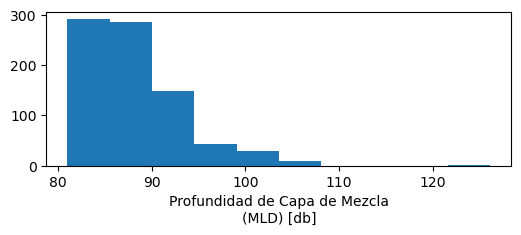

In [35]:
dsp['MLD'].plot.hist(figsize=(6,2));

plot MLD along the dataset potential density like this:

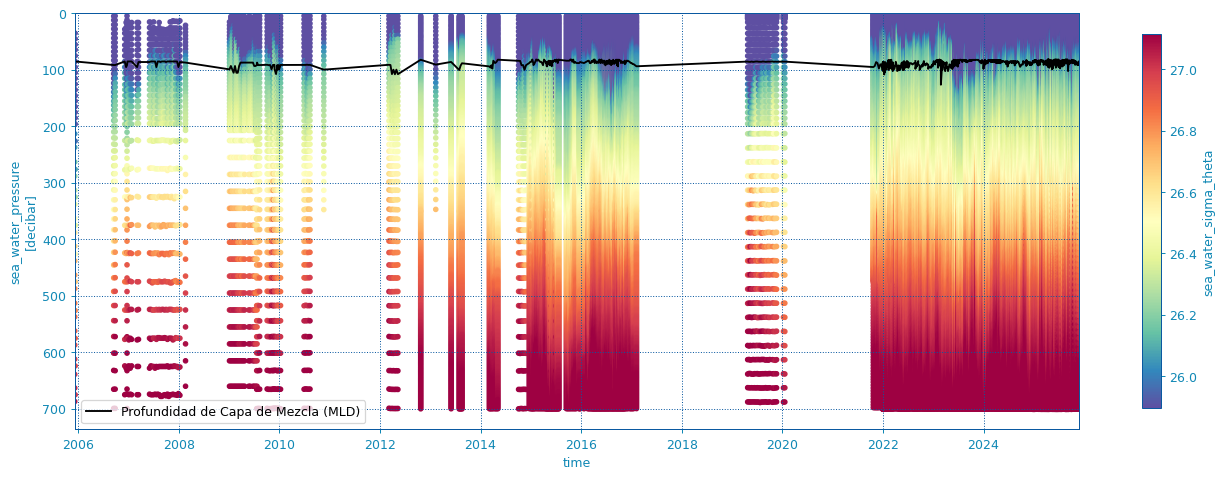

In [36]:
fig, ax, _, _ = scatter_plot(dsp, 'SIG0', cmap='Spectral_r', s=12, cbar=True);

ax.plot(dsp['TIME'], dsp['MLD'], 'k', label=dsp['MLD'].attrs['long_name'])

ax.legend(loc='lower left');

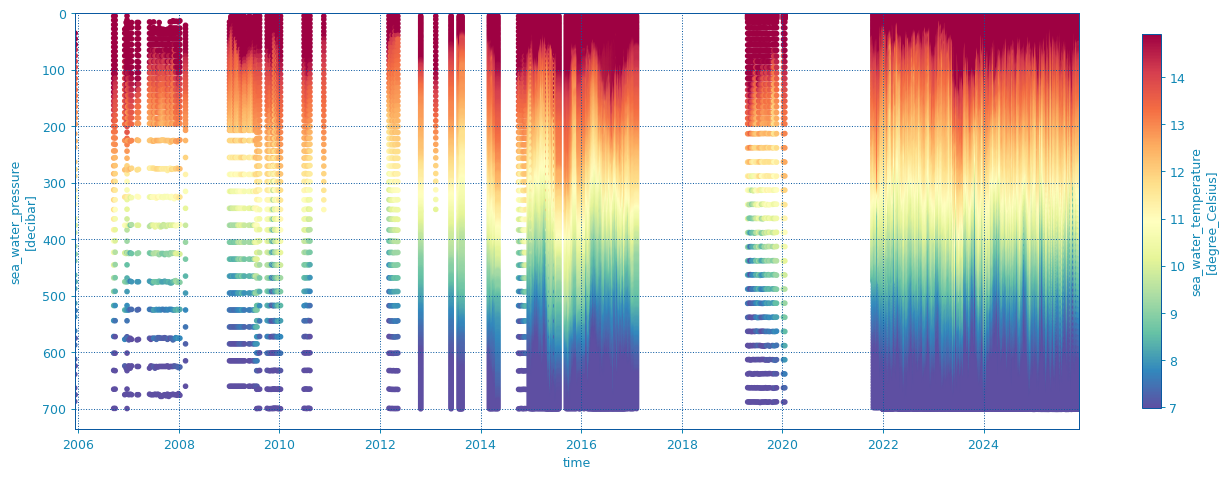

In [37]:
scatter_plot(dsp, 'TEMP', cmap='Spectral_r', s=12, cbar=True);

Produce a *map* of MLD  using xarray plotting

https://matplotlib.org/stable/plot_types/basic/scatter_plot.html#sphx-glr-plot-types-basic-scatter-plot-py

In [38]:
# plt.scatter(x=dsp.LONGITUDE, y=dsp.LATITUDE, c=dsp.MLD, s=10);

- https://tutorial.xarray.dev/fundamentals/04.0_plotting.html
- https://docs.xarray.dev/en/stable/user-guide/plotting.html#scatter
- https://docs.xarray.dev/en/stable/user-guide/plotting.html#maps

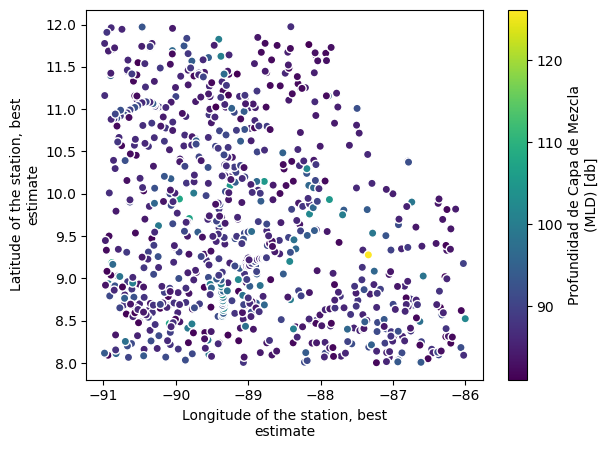

In [39]:
dsp.plot.scatter(x='LONGITUDE', y='LATITUDE', hue='MLD', add_colorbar=True);

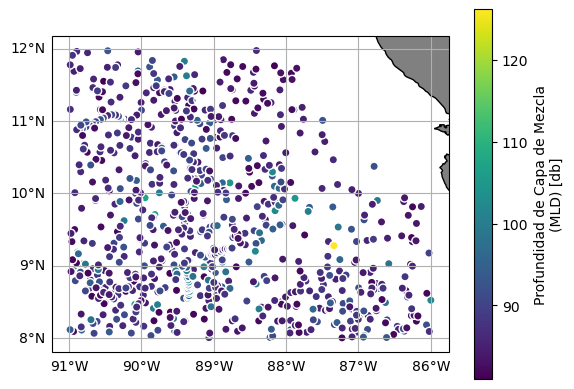

In [40]:
p = dsp.plot.scatter(
    x='LONGITUDE', y='LATITUDE', hue='MLD', add_colorbar=True,
    subplot_kws=dict(projection=ccrs.PlateCarree()),
    transform=ccrs.PlateCarree(),
)
p.axes.add_feature(cartopy.feature.LAND, facecolor='gray')
p.axes.coastlines()
gl = p.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

Visualizaciones mas especificas. Ver https://argopy.readthedocs.io/en/latest/user-guide/working-with-argo-data/visualisation.html

In [41]:
from argopy.plot import ArgoColors

# Use standard colormaps
# ArgoColors('data_mode')
# ArgoColors('qc_flag')
# ArgoColors('deployment_status')

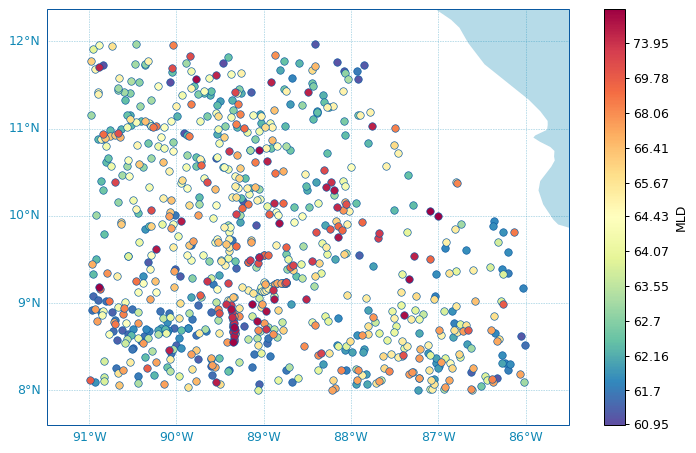

In [24]:
scatter_map(dsp.isel(N_LEVELS=0), hue='MLD', cmap='Spectral_r', traj=False, legend=False, cbar=True);

## Dashboard

In [25]:
np.unique(ds.PLATFORM_NUMBER.data)

array([1900379, 1902692, 2903792, 2903800, 2903880, 2903904, 3900407,
       3900410, 3900741, 3900785, 3900786, 3901155, 3901300, 4900449,
       4900762, 4902476, 4903666, 5903837, 5903872, 5904135, 5904136,
       5906478, 5906479, 5906480, 5906486, 7901042, 7901109])

In [26]:
# Esta es una boya Argo BGC activa lanzada este año, por mi universidad!
plataforma_num = 7901109

In [27]:
DataFetcher().float(plataforma_num).dashboard()

In [28]:
# DataFetcher().profile(plataforma_num, 10).dashboard()